## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



**Import the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets

**Load the data into pandas dataframe . Load the Boston Housing DataSet from data/boston_house_prices.csv**

In [2]:
file_path = "/data/boston_house_prices.csv"

In [3]:
df = pd.read_csv('data/boston_house_prices.csv', skiprows=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Data preprocessing**

Check for missing values in all the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Visualization**

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

<Axes: >

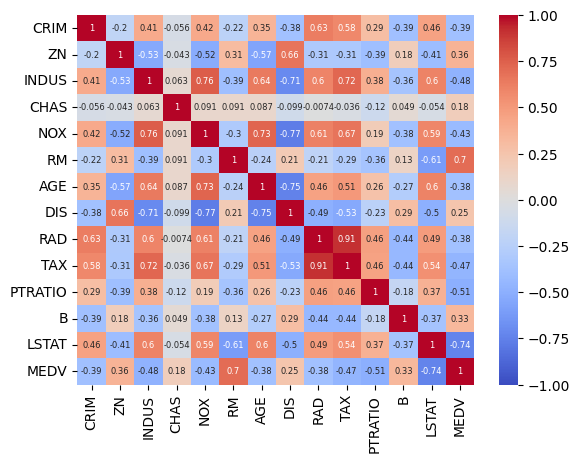

In [7]:
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, annot_kws={"size": 6})


In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
# axis= 1, para indicar que quieres borrar la columna
df = df.drop("RAD", axis=1)

In [10]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0


### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

<Axes: xlabel='MEDV', ylabel='LSTAT'>

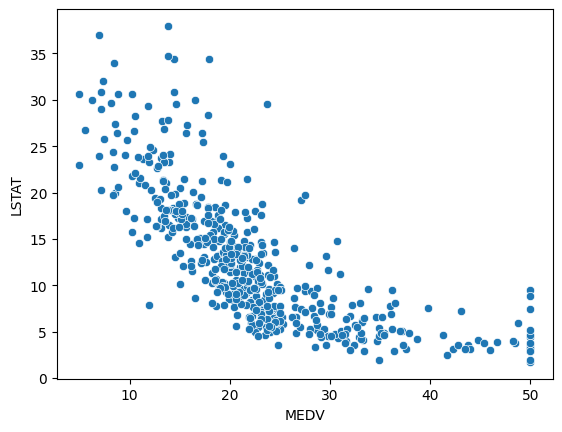

In [11]:
sns.scatterplot(data = df, x = "MEDV", y = "LSTAT")

<Axes: xlabel='MEDV', ylabel='RM'>

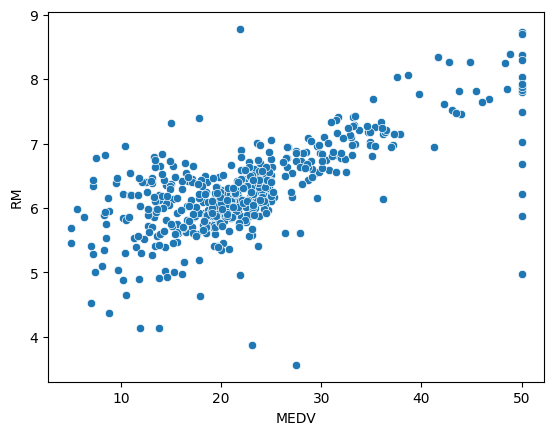

In [12]:
sns.scatterplot(data = df, x = "MEDV", y = "RM")

<Axes: xlabel='MEDV', ylabel='RM'>

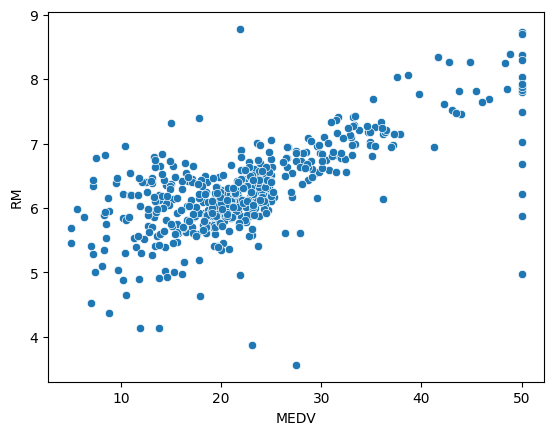

In [13]:
sns.scatterplot(df, x = df["MEDV"], y = df["RM"])

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [14]:
# Preparar variables
X = df[["LSTAT", "RM"]]
y = df["MEDV"]

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

In [19]:
print("Regresión Lineal R2:", r2_score(y_test, y_pred_lin))
print("Regresión Lineal MSE:", mean_squared_error(y_test, y_pred_lin))

NameError: name 'r2_score' is not defined

**Evaluate the model performance in the training and testing sets**

**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

**Did the model improve using the Polynomial model?**

**Did the model improve using the Polynomial model with degree 3? Or more?**